##reference##

https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html



In [62]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

transforms.ToTensor() — converts the image into numbers, that are understandable by the system. It separates the image into three color channels (separate images): red, green & blue. Then it converts the pixels of each image to the brightness of their color between 0 and 255. These values are then scaled down to a range between 0 and 1. The image is now a Torch Tensor.
transforms.

Normalize() — normalizes the tensor with a mean and standard deviation which goes as the two parameters respectively.

In [63]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

downloading the dataset and performing transform by calling transform

In [64]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


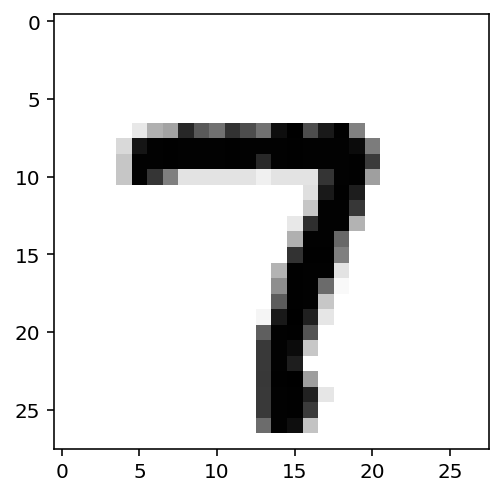

In [65]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

In [68]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [500, 250,100]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=250, bias=True)
  (3): ReLU()
  (4): Linear(in_features=250, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


 negative log-likelihood loss. It is useful to train a classification problem with C classes. Together the LogSoftmax() and NLLLoss() acts as the cross-entropy loss

In [69]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [70]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 9.3412e-04,  9.3412e-04,  9.3412e-04,  ...,  9.3412e-04,
          9.3412e-04,  9.3412e-04],
        [ 1.9726e-04,  1.9726e-04,  1.9726e-04,  ...,  1.9726e-04,
          1.9726e-04,  1.9726e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [ 1.2837e-04,  1.2837e-04,  1.2837e-04,  ...,  1.2837e-04,
          1.2837e-04,  1.2837e-04],
        [ 2.1974e-04,  2.1974e-04,  2.1974e-04,  ...,  2.1974e-04,
          2.1974e-04,  2.1974e-04],
        [-2.8723e-05, -2.8723e-05, -2.8723e-05,  ..., -2.8723e-05,
         -2.8723e-05, -2.8723e-05]])


We make use of torch.optim which is a module provided by PyTorch to optimize the model, perform gradient descent and update the weights by back-propagation. Thus in each epoch (number of times we iterate over the training set), we will be seeing a gradual decrease in training loss.

In [71]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.Adam(model.parameters(), lr=0.01, momentum=0.5)

In [72]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0316, -0.0036,  0.0086,  ...,  0.0069,  0.0142,  0.0332],
        [-0.0233, -0.0005,  0.0038,  ...,  0.0178,  0.0350, -0.0054],
        [ 0.0122, -0.0336,  0.0211,  ..., -0.0066, -0.0081,  0.0186],
        ...,
        [ 0.0031,  0.0192,  0.0132,  ..., -0.0231,  0.0233,  0.0091],
        [ 0.0338,  0.0081, -0.0055,  ...,  0.0342,  0.0179,  0.0234],
        [-0.0155, -0.0257, -0.0159,  ..., -0.0191, -0.0050,  0.0067]],
       requires_grad=True)
Gradient - tensor([[ 2.2393e-04,  2.2393e-04,  2.2393e-04,  ...,  2.2393e-04,
          2.2393e-04,  2.2393e-04],
        [ 2.3400e-04,  2.3400e-04,  2.3400e-04,  ...,  2.3400e-04,
          2.3400e-04,  2.3400e-04],
        [-1.4023e-04, -1.4023e-04, -1.4023e-04,  ..., -1.4023e-04,
         -1.4023e-04, -1.4023e-04],
        ...,
        [ 2.1205e-04,  2.1205e-04,  2.1205e-04,  ...,  2.1205e-04,
          2.1205e-04,  2.1205e-04],
        [ 8.9494e-05,  8.9494e-05,  8.9494e-05,  ...,  8.9494e

In [73]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0316, -0.0036,  0.0086,  ...,  0.0069,  0.0142,  0.0332],
        [-0.0233, -0.0005,  0.0038,  ...,  0.0178,  0.0350, -0.0054],
        [ 0.0122, -0.0336,  0.0211,  ..., -0.0066, -0.0081,  0.0186],
        ...,
        [ 0.0031,  0.0191,  0.0132,  ..., -0.0231,  0.0233,  0.0091],
        [ 0.0338,  0.0081, -0.0055,  ...,  0.0342,  0.0179,  0.0234],
        [-0.0155, -0.0257, -0.0159,  ..., -0.0192, -0.0050,  0.0067]],
       requires_grad=True)


In [74]:
optimizer = optim.Adam(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.7776471551563313
Epoch 1 - Training loss: 0.2742824146329467
Epoch 2 - Training loss: 0.19163944092847263
Epoch 3 - Training loss: 0.14588828172796825
Epoch 4 - Training loss: 0.11752894837091536
Epoch 5 - Training loss: 0.09782776852765841
Epoch 6 - Training loss: 0.08565210163104794
Epoch 7 - Training loss: 0.07296261221353116
Epoch 8 - Training loss: 0.06327793473101803
Epoch 9 - Training loss: 0.05649926098731797
Epoch 10 - Training loss: 0.04895542214300905
Epoch 11 - Training loss: 0.04318800402260614
Epoch 12 - Training loss: 0.03896432332342058
Epoch 13 - Training loss: 0.03361290998184489
Epoch 14 - Training loss: 0.030793220811421232

Training Time (in minutes) = 3.5141516447067263


In [75]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))

    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

Predicted Digit = 5


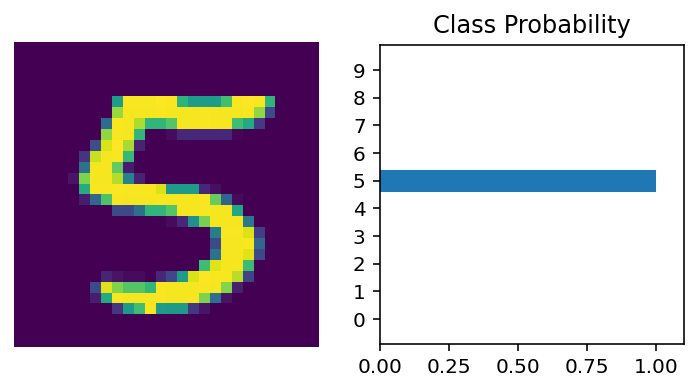

In [76]:
images, labels = next(iter(valloader))

img = images[4].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

Predicted Digit = 0


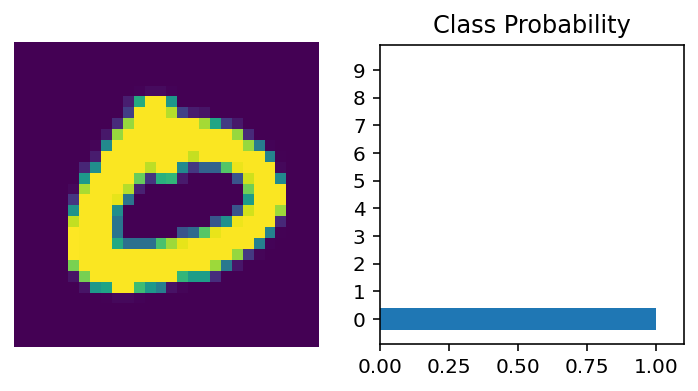

In [79]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

Predicted Digit = 8


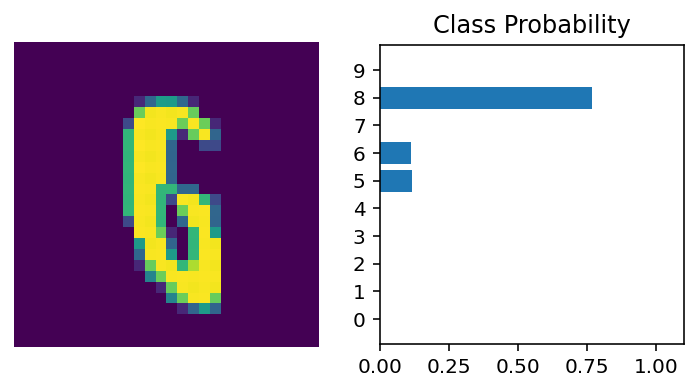

In [80]:
images, labels = next(iter(valloader))

img = images[8].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

Predicted Digit = 1


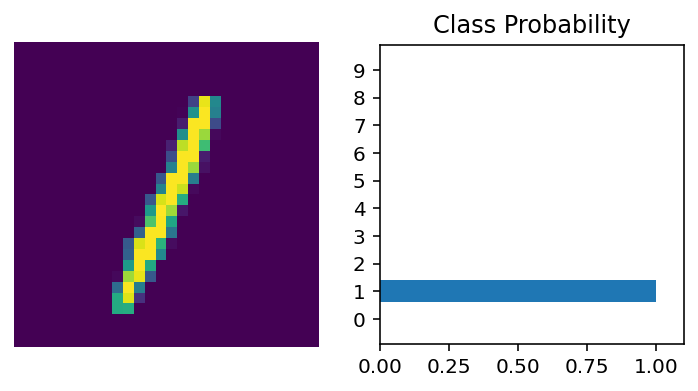

In [83]:
images, labels = next(iter(valloader))

img = images[16].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

Predicted Digit = 9


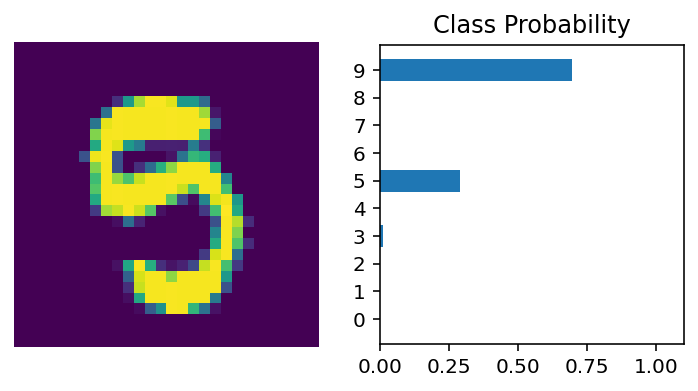

In [96]:
images, labels = next(iter(valloader))

img = images[11].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

Now we iterate through the validation set using a for loop and calculate the total number of correct predictions. This is how we can calculate the accuracy.

In [77]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9781


Now that we are done with everything, we do not want to lose the trained model. We don’t want to train it every time we use it. For this purpose, we will be saving the model. When we need it in the future, we can load it and use it directly without further training.

In [78]:
torch.save(model, './my_mnist_model.pt') 